In [ ]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
data = pd.read_csv(f'PATH/implementation_sample_1.csv.gz',compression='gzip',lineterminator='\n');

In [ ]:
y = data['class']
X = data.drop(['class'],axis=1)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X, y)

KNeighborsClassifier()

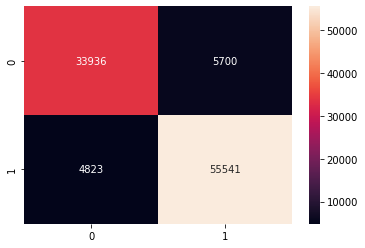

In [ ]:
y_predict_train = classifier.predict(X)
cm = confusion_matrix(y, y_predict_train)
sns.heatmap(cm, annot=True,fmt="d")

In [ ]:
print(classification_report(y, y_predict_train))

              precision    recall  f1-score   support

         bot       0.88      0.86      0.87     39636
       human       0.91      0.92      0.91     60364

    accuracy                           0.89    100000
   macro avg       0.89      0.89      0.89    100000
weighted avg       0.89      0.89      0.89    100000



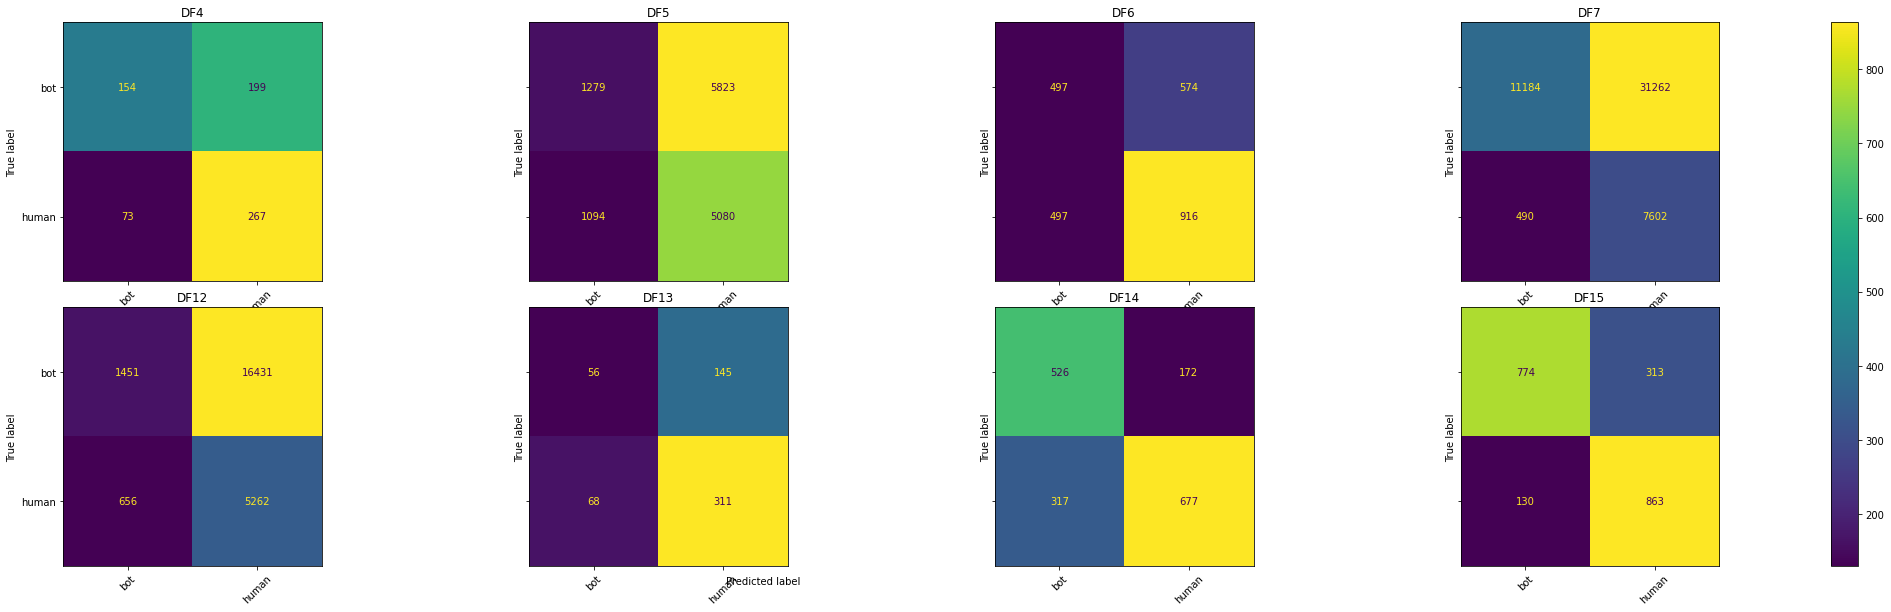

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,DF4,0.678414,0.436261,0.531034,353,0.572961,0.785294,0.662531,340,0.607504
1,DF5,0.538980,0.180090,0.269974,7102,0.465927,0.822805,0.594952,6174,0.478985
2,DF6,0.500000,0.464052,0.481356,1071,0.614765,0.648266,0.631071,1413,0.568841
3,DF7,0.958026,0.263488,0.413304,42446,0.195605,0.939446,0.323792,8092,0.371720
4,DF12,0.688657,0.081143,0.145180,17882,0.242567,0.889152,0.381152,5918,0.282059
5,DF13,0.451613,0.278607,0.344615,201,0.682018,0.820580,0.744910,379,0.632759
6,DF14,0.623962,0.753582,0.682674,698,0.797409,0.681087,0.734672,994,0.710993
7,DF15,0.856195,0.712052,0.777499,1087,0.733844,0.869084,0.795758,993,0.787019


In [ ]:
datasets=["DF4","DF5","DF6","DF7","DF12","DF13","DF14","DF15"]
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])

f, axes = plt.subplots(2, 4, figsize=(40, 10), sharey='row')

for index,dataset in enumerate(datasets):
  test = pd.read_csv(f'PATH/{dataset}.csv.gz',compression='gzip',lineterminator='\n');
  test= test.sample(frac=1).reset_index(drop=True)

  y_test_predict = classifier.predict(test.drop(['class'],axis=1))


  classifer_accuracy_row=[dataset]
  for index_2,(key,value) in enumerate(classification_report(test['class'], y_test_predict,output_dict=True).items()):
    if key in ["bot","human"]:
      classifer_accuracy_row.extend([*value.values()])
    elif key=="accuracy":
      classifer_accuracy_row.append(value)
  classifer_accuracy_result.loc[index]=classifer_accuracy_row

  cf_matrix = confusion_matrix(test['class'], y_test_predict)
  disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
  disp.plot(ax=axes[int(np.floor(index/4))][index%4], xticks_rotation=45)
  disp.ax_.set_title(dataset)
  disp.im_.colorbar.remove()
  disp.ax_.set_xlabel('')


f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)